<a href="https://colab.research.google.com/github/mahmutakar0/Beksan/blob/main/satislar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satış analizi


## A-) Verinin işlenmesi


Gerekli kütüphanelerin yüklenmesi

In [254]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



Verinin işlenmesi

In [255]:
# df değişkeninin tanımlanması
url= "https://raw.githubusercontent.com/mahmutakar0/Beksan/main/ddata.csv"

satis = pd.read_csv(url, sep=";")
df = satis.copy()

print(df.columns)
df.head(2)

Index(['STOK_ADI', 'MUSTERI_KODU', 'MUSTERI_ISMI', 'FATURA_NO', 'TARIH',
       'MIKTAR3', 'TL/KG', 'USD/KG', 'FIYAT', 'NET_TUTAR', 'DOV_FIYAT',
       'DOV_TUTAR', 'KUR', 'ISLEM_TURU', 'SUBE_KODU', 'UNVAN', 'STOKGRUP_ISMI',
       'STOKKOD4_ISMI', 'STOKKOD5_ISMI', 'SATIS_TEMSILCISI_KODU', 'SEHİR',
       'ULKE_KODU', 'CARI_ACILIS', 'CARI_GRUP_KODU', 'DAHIL', 'ISLEM_YERI'],
      dtype='object')


,STOK_ADI,MUSTERI_KODU,MUSTERI_ISMI,FATURA_NO,TARIH,MIKTAR3,TL/KG,USD/KG,FIYAT,NET_TUTAR,...,STOKGRUP_ISMI,STOKKOD4_ISMI,STOKKOD5_ISMI,SATIS_TEMSILCISI_KODU,SEHİR,ULKE_KODU,CARI_ACILIS,CARI_GRUP_KODU,DAHIL,ISLEM_YERI
0,"DÖKME ÇIVI-RING 2,50x030x6,1mm-25 KG.",120.02.ES008,PISO Y PARED DE ESPANA SL,IHR000000000189,12.06.2020,3000,"5,374193","0,792338351","5,37419333","16122,57999",...,MAMUL,03.RİNG DÖKME,2.OVALI ÇİVİLER,KE,CASTELLON,ES,26.05.2014,8.0,DIGER,Y.DISI
1,"DÖKME ÇIVI-RING 2,50x030x6,1mm-25 KG.",120.02.ES008,PISO Y PARED DE ESPANA SL,IHR000000000246,29.07.2020,3000,"7,12824","1,035389129","7,12824","21384,72",...,MAMUL,03.RİNG DÖKME,2.OVALI ÇİVİLER,KE,CASTELLON,ES,26.05.2014,8.0,DIGER,Y.DISI


In [256]:
# df tablo
df = df[[ "TARIH","MUSTERI_ISMI", "MIKTAR3", "DOV_TUTAR", "STOKKOD5_ISMI", "SEHİR", "ULKE_KODU", "ISLEM_YERI"]]
df.head(2)

,TARIH,MUSTERI_ISMI,MIKTAR3,DOV_TUTAR,STOKKOD5_ISMI,SEHİR,ULKE_KODU,ISLEM_YERI
0,12.06.2020,PISO Y PARED DE ESPANA SL,3000,"2377,015052",2.OVALI ÇİVİLER,CASTELLON,ES,Y.DISI
1,29.07.2020,PISO Y PARED DE ESPANA SL,3000,"3106,167388",2.OVALI ÇİVİLER,CASTELLON,ES,Y.DISI


In [257]:
# df tablo güncellemesi
df = df.rename(columns={"TARIH": "tarih", "MUSTERI_ISMI": "musteri", "MIKTAR3": "kg", "DOV_TUTAR": "tutar", "STOKKOD5_ISMI": "ürün","SEHİR": "sehir", "ULKE_KODU": "ülke", "ISLEM_YERI": "yer"})
df["ürün"] = df["ürün"].replace("1.DÜZ ÇİVİLER", "DÜz ÇİVİLER")
df["ürün"] = df["ürün"].replace("2.OVALI ÇİVİLER", "OVALI ÇİVİLER")
df["ürün"] = df["ürün"].replace("3.T.DİZ.ÇİVİLER", "T.DİZ.ÇİVİLER")
df["ürün"] = df["ürün"].replace("4.TELLER", "TELLER")
df["ürün"] = df["ürün"].replace("5.PLASTİĞE DİZİLİ ÇİVİLER", "PLASTİĞE DİZİLİ ÇİVİLER")

# df info
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29204 entries, 0 to 29203
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tarih    29204 non-null  object
 1   musteri  29204 non-null  object
 2   kg       29204 non-null  object
 3   tutar    29140 non-null  object
 4   ürün     29204 non-null  object
 5   sehir    29046 non-null  object
 6   ülke     29204 non-null  object
 7   yer      29204 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB
None


,tarih,musteri,kg,tutar,ürün,sehir,ülke,yer
0,12.06.2020,PISO Y PARED DE ESPANA SL,3000,"2377,015052",OVALI ÇİVİLER,CASTELLON,ES,Y.DISI
1,29.07.2020,PISO Y PARED DE ESPANA SL,3000,"3106,167388",OVALI ÇİVİLER,CASTELLON,ES,Y.DISI


In [258]:
df.head()

,tarih,musteri,kg,tutar,ürün,sehir,ülke,yer
0,12.06.2020,PISO Y PARED DE ESPANA SL,3000,"2377,015052",OVALI ÇİVİLER,CASTELLON,ES,Y.DISI
1,29.07.2020,PISO Y PARED DE ESPANA SL,3000,"3106,167388",OVALI ÇİVİLER,CASTELLON,ES,Y.DISI
2,22.12.2020,"MUNDOPALET, S.L.",3750,"3339,874166",OVALI ÇİVİLER,VALENCIA,ES,Y.DISI
3,23.12.2020,"MUNDOPALET, S.L.",1000,"895,3095537",OVALI ÇİVİLER,VALENCIA,ES,Y.DISI
4,14.05.2020,"MUNDOPALET, S.L.",3750,"2838,18653",OVALI ÇİVİLER,VALENCIA,ES,Y.DISI


In [259]:
# df columnlarının veri tipini düzenleme
df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%Y')
df['tutar'] = df['tutar'].str.replace(',', '.').astype(float)
df['kg'] = df['kg'].str.replace(',', '.').astype(float)
df['tutar'] = df['tutar'].round(2)
df['kg'] = df['kg'].round(2)
df.info()

df.dropna(subset=['tutar'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29204 entries, 0 to 29203
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tarih    29204 non-null  datetime64[ns]
 1   musteri  29204 non-null  object        
 2   kg       29204 non-null  float64       
 3   tutar    29140 non-null  float64       
 4   ürün     29204 non-null  object        
 5   sehir    29046 non-null  object        
 6   ülke     29204 non-null  object        
 7   yer      29204 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.8+ MB


#### Gün

In [260]:
# df_grouped_tarih değişkeninin oluşturulması
df_grouped_tarih = df.groupby(by ="tarih")[["kg", "tutar"]].sum().sort_values(by="tarih", ascending=True)
df_grouped_tarih = df_grouped_tarih.reset_index()
df_grouped_tarih.head(2)

,tarih,kg,tutar
0,2020-01-02,14201.89,12312.11
1,2020-01-03,69011.31,59062.82


#### İstatiksel veriler

In [261]:
def check_df(df_grouped_tarih, head=5):
    print("##################### Shape #####################")
    print(df_grouped_tarih.shape)
    print("##################### Types #####################")
    print(df_grouped_tarih.dtypes)
    print("##################### Head #####################")
    print(df_grouped_tarih.head(head))
    print("##################### Tail #####################")
    print(df_grouped_tarih.tail(head))
    print("##################### NA #####################")
    print(df_grouped_tarih.isnull().sum())
    print("##################### Quantiles #####################")
    print(df_grouped_tarih.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_grouped_tarih)

##################### Shape #####################
(918, 3)
##################### Types #####################
tarih    datetime64[ns]
kg              float64
tutar           float64
dtype: object
##################### Head #####################
       tarih        kg     tutar
0 2020-01-02  14201.89  12312.11
1 2020-01-03  69011.31  59062.82
2 2020-01-06  34740.12  31791.48
3 2020-01-07  36840.47  33230.49
4 2020-01-08  55967.35  44958.17
##################### Tail #####################
         tarih        kg     tutar
913 2023-09-04  67167.57  60317.98
914 2023-09-05  29995.74  31574.03
915 2023-09-06  22601.77  27377.45
916 2023-09-07  33022.28  27900.15
917 2023-09-08  66424.98  59720.30
##################### NA #####################
tarih    0
kg       0
tutar    0
dtype: int64
##################### Quantiles #####################
       0.00        0.05       0.50         0.95         0.99       1.00
kg      0.0  12837.7350  59907.520  145972.2775  227403.9396  447980.00
tutar   

<ipython-input-261-95c93459328a>:13: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [262]:
# Günlük satışlar grafiği
fig = px.scatter(df_grouped_tarih, x='tarih', y='tutar', title='Günlük satışlar')
fig.update_layout(title='Günlük satışlar', xaxis_title='Tarih', yaxis_title='Değer', title_x=0.5)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

#### Ay

In [263]:
# df_grouped_taring değişkeninin oluşturulması
df_grouped_tarih["tarihm"] = pd.to_datetime(df_grouped_tarih["tarih"], format="%m.%Y")
df_grouped_tarih["tarihm"] = df_grouped_tarih["tarih"].dt.to_period("M").dt.to_timestamp()
df_grouped_taring = df_grouped_tarih.groupby(by ="tarihm")[["kg", "tutar"]].sum().sort_values(by="tarihm", ascending=True)
df_grouped_taring = df_grouped_taring.reset_index()
df_grouped_taring = df_grouped_taring.drop([44])
df_grouped_taring["ma6"] = df_grouped_taring["tutar"].rolling(window=6).mean()

# aylık satış grafiği
fig = px.scatter(df_grouped_taring, x='tarihm', y='tutar', title='Aylık satışlar')
fig.update_layout(title='Aylık satışlar', xaxis_title='Tarih', yaxis_title='Tutar($)', title_x=0.5)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

##### Aylık SMA değerleri

In [264]:
# sma değişkeninin oluşturulması ve grafiği
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar"], name="Tutar($)"), secondary_y=False)
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["ma6"], name="SMA6"), secondary_y=True)
fig.update_layout(title_text="Tutar($) ve 6 Aylık Basit Hareketli Otalama (SMA) Değeri", title_x=0.5)
fig.update_xaxes(title_text="Tarih")
fig.update_yaxes(title_text="Değer", secondary_y=False)
fig.update_yaxes(title_text="SMA6", secondary_y=True)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

##### Aylık CMA değeri

In [265]:
# cma değişkeninin oluşturulması ve grafiği

df_grouped_taring["cma"] = df_grouped_taring["tutar"].expanding().mean()

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar"], name="Tutar($)"), secondary_y=False)
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["cma"], name="CMA"), secondary_y=True)

fig.update_layout(title_text="Tutar($) ve Aylık Biriken Hareketli Ortalama(CMA) Değeri", title_x=0.5)
fig.update_xaxes(title_text="Tarih")
fig.update_yaxes(title_text="Değer", secondary_y=False)
fig.update_yaxes(title_text="CMA", secondary_y=True)
fig.update_yaxes(
    hoverformat=",.0f")

fig.show()

##### Aylık EMA değeri

In [266]:
# ema'nın tanımlanması
def ema(values, alpha):
    ema = [values[0]]
    for value in values[1:]:
        ema.append(alpha * value + (1 - alpha) * ema[-1])
    return ema
df_grouped_taring["tutar_ema"] = ema(df_grouped_taring["tutar"], alpha=0.2)

# emanın satışlar ile grafiği
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar"], name="Tutar($)"), secondary_y=False)
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar_ema"], name="EMA"), secondary_y=True)
fig.update_layout(title_text="Tutar($) ve Aylık Üstel Hareketli Ortalama(EMA) Değeri", title_x=0.5)
fig.update_xaxes(title_text="Tarih")
fig.update_yaxes(title_text="Değer", secondary_y=False)
fig.update_yaxes(title_text="EMA", secondary_y=True)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

#### Ülke

In [267]:
# grouped_ülke_D değişkeninin oluşturulması
grouped_ülke =df.groupby(by= "ülke")[["kg", "tutar"]].sum().reset_index()
grouped_ülke = grouped_ülke.rename(columns={"tutar": "Toplam tutar($)", "kg": "Kg miktarı"})
grouped_ülke_kg = grouped_ülke.sort_values(by= "Kg miktarı", ascending=False).reset_index()
grouped_ülke_D = grouped_ülke.sort_values(by= "Toplam tutar($)", ascending= False).reset_index()

# Ülke satış grafiği
fig = px.bar(grouped_ülke, x='ülke', y=['Toplam tutar($)', 'Kg miktarı'],
              labels={'ülke': 'Ülke', 'value': 'Değer'},
              barmode='group')


fig.update_layout(title={'text': 'Ülkeye Göre Satış Verisi', 'x': 0.5},legend_title=None)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

#### Firma

In [268]:
# grouped_firma değişkeninin oluşturulması
grouped_firma = df.groupby( by= "musteri")[["kg","tutar"]].sum()
grouped_firma = grouped_firma.sort_values(by="tutar",ascending=False).reset_index()
grouped_firma.head(2)

,musteri,kg,tutar
0,"PRIMESOURCE BUILDING PRODUCTS,INC.",5486993.64,7044248.34
1,METROPOLITAN STAPLE CORP.,4715598.66,5492207.16


##### Yurt dışı

In [269]:
# ydisi_mus_D10 değişkeninin oluşturulması
ydisi = df[df['yer'] != 'Y.IÇI'].copy()
ydisi_mus_D = ydisi.groupby( by= "musteri")[["kg","tutar"]].sum().reset_index()
ydisi_mus_D = ydisi_mus_D.sort_values(by="tutar",ascending=False)
ydisi_mus_D10 = ydisi_mus_D.head(10)


# Yurt dışı satış grafiği
fig = px.bar(ydisi_mus_D10, x='musteri', y=['tutar', 'kg'],
              labels={'musteri': 'Müşteri', 'value': 'Değer'},
              barmode='group')

fig.update_layout(title={'text': 'Yurt Dışı Satış Verisi (ilk 10)', 'x': 0.5},legend_title=None)
fig.update_xaxes(
        ticktext=['PRIMESOURCE  B', 'METROPOLITAN S', 'MADERAS V', 'SHANDEX CO', 'AGLOLAK SL', 'PALSER B', 'MATERIALES Y ', 'THIBO', 'SCOTT T', 'JZW I'],
        tickvals=ydisi_mus_D10['musteri'])

fig.update_yaxes(hoverformat=",.0f")
fig.show()

##### Yurt içi

In [270]:
# yiçi_mus_D10 değişkeninin oluşturulması

yiçi = df[df['yer'] != 'Y.DISI'].copy()

yiçi_mus_D = yiçi.groupby( by= "musteri")[["kg","tutar"]].sum().reset_index()
yiçi_mus_D = yiçi_mus_D.sort_values(by="tutar",ascending=False)
yiçi_mus_D10 = yiçi_mus_D.head(10)

# Yurt içi satış grafiği
fig = px.bar(yiçi_mus_D10, x='musteri', y=['tutar', 'kg'],
              labels={'musteri': 'Müşteri', 'value': 'Değer'},
              barmode='group')

fig.update_layout(title={'text': 'Yurt İçi Satış Verisi (ilk 10)', 'x': 0.5},legend_title=None)

fig.update_xaxes(
    ticktext=['BEKKİLER M', 'ALTINOK T', 'YURTERİ O', 'TENERLER O', 'SONÇAĞ T', 'NİF O', 'EMRULLAH Y', 'METAL M', 'TAÇ P', 'DADAŞLAR A'],
    tickvals=yiçi_mus_D10['musteri'])

fig.update_yaxes(hoverformat=",.0f")

fig.show()

#### Ürün

In [271]:
# grouped_ürün değişkeninin oluşturulması
grouped_ürün = df.groupby( by= "ürün")[["kg","tutar"]].sum()
grouped_ürün = grouped_ürün.sort_values(by="tutar",ascending=False).reset_index()

# Ürün satış grafiği
fig = px.bar(grouped_ürün, x='ürün', y=['tutar', 'kg'],
              labels={'musteri': 'Müşteri', 'value': 'Değer'},
              barmode='group')
fig.update_layout(title={'text': 'Ürünlerin Satış Verileri', 'x': 0.5},legend_title=None)

fig.update_xaxes(
    ticktext=["T.DİZ.ÇİVİLER", "OVALI ÇİVİLER", "DÜZ ÇİVİLER", "PLASTİĞE DİZİLİ ÇİVİLER", "TELLER"],
    tickvals=grouped_ürün['ürün'])
fig.update_yaxes(hoverformat=",.0f")

fig.show()

## B-) Tahmin Modelleri

#### Polinom regresyon

In [272]:
grouped_aya = df_grouped_taring.copy()
grouped_aya.head(2)
dfpoli = grouped_aya[["tarihm","tutar"]]

x = dfpoli["tarihm"]
y = dfpoli["tutar"].to_numpy()

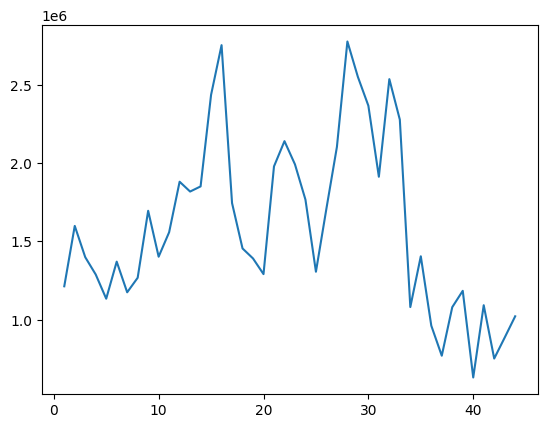

#####################################################################
#####################################################################


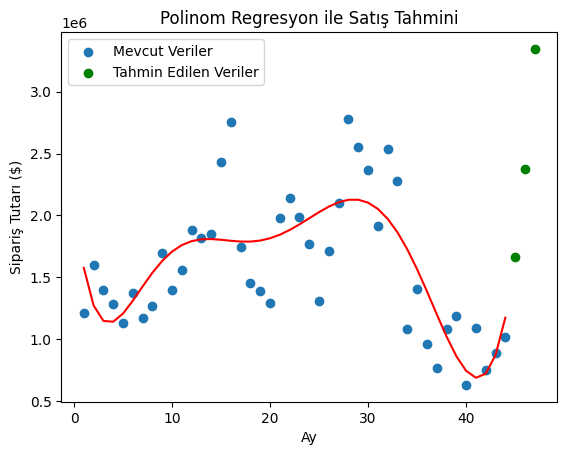

#####################################################################
#####################################################################
Tahmin hatası: 126471435203.42198
R kare katsayısı: 0.5775295528150333
Ortalama mutlak hata (MAE): 279845.59857911663


In [273]:
# Model
grouped_aya = df_grouped_taring.copy()
numbers = list(range(1, 45)) # ay sırasını temsilen yapılan numaralandırma
grouped_aya = grouped_aya.assign(numbers=numbers)

grouped_aya = grouped_aya[["numbers", "tutar"]]
grouped_aya.rename(columns={"numbers": "ay_no", }, inplace=True)

grouped_ayac = grouped_aya.copy()

x = grouped_aya["ay_no"].to_numpy()
y = grouped_aya["tutar"].to_numpy()

plt.plot(x,y)
plt.show()



print("#####################################################################")
print("#####################################################################")



# Reshape
x = x.reshape(44,1)
y= y.reshape(44,1)

# model- tahmin
tahminpolinom = PolynomialFeatures(degree=7)
Xyeni = tahminpolinom.fit_transform(x)

polinommodel = LinearRegression()
polinommodel.fit(Xyeni, y)

x_tahmin = np.array([45, 46, 47])
Xyeni_tahmin = tahminpolinom.transform(x_tahmin.reshape(-1, 1))
y_tahmin = polinommodel.predict(Xyeni_tahmin)

# Modelin görselleştirilmesi
plt.scatter(x, y, label='Mevcut Veriler')
plt.scatter(x_tahmin, y_tahmin, color='green', label='Tahmin Edilen Veriler')  # x_tahmin ve y_tahmin'i ekleyin

plt.plot(x, polinommodel.predict(Xyeni), color='red')
plt.title("Polinom Regresyon ile Satış Tahmini", fontdict={"fontsize": 12})
plt.xlabel('Ay')
plt.ylabel('Sipariş Tutarı ($)')
plt.legend()
plt.show()


print("#####################################################################")
print("#####################################################################")



# Hata değerleri
ycyeni = polinommodel.predict(Xyeni)
tahmin_hatasi = np.mean((y - ycyeni)**2)
r_kare = 1 - (np.sum((y - ycyeni)**2) / np.sum((y - np.mean(y))**2))
mae = np.mean(np.abs(y - ycyeni))

print("Tahmin hatası:", tahmin_hatasi)
print("R kare katsayısı:", r_kare)
print("Ortalama mutlak hata (MAE):", mae)


### Fb-prophet

<ipython-input-274-650bdded6107>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqb4tkmpb/ixvr4atn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqb4tkmpb/jn5p9va4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98674', 'data', 'file=/tmp/tmpqb4tkmpb/ixvr4atn.json', 'init=/tmp/tmpqb4tkmpb/jn5p9va4.json', 'output', 'file=/tmp/tmpqb4tkmpb/prophet_modelj0ayn_

#####################################################################
#####################################################################
          ds          yhat    yhat_lower    yhat_upper
0 2023-08-01  1.423620e+06  7.900457e+05  2.051345e+06
1 2023-09-01  2.129816e+06  1.509264e+06  2.751973e+06
2 2023-10-01  1.110393e+06  4.537207e+05  1.752879e+06
3 2023-11-01  1.743379e+06  1.110999e+06  2.397360e+06
4 2023-12-01  1.177402e+06  5.623028e+05  1.795398e+06
#####################################################################
#####################################################################


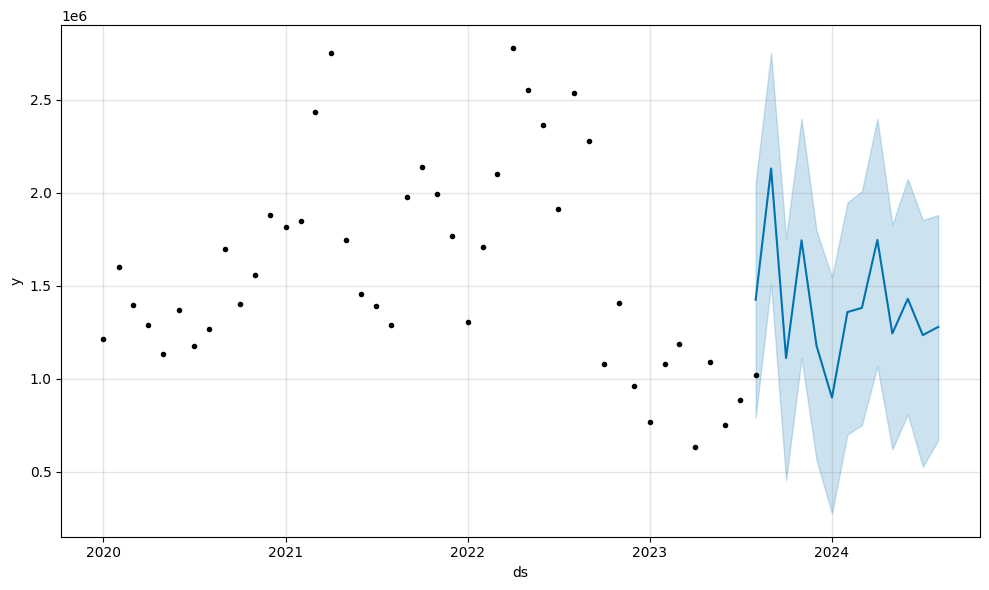

<ipython-input-274-650bdded6107>:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqb4tkmpb/yz9kvyfm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqb4tkmpb/gsaauvzh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64993', 'data', 'file=/tmp/tmpqb4tkmpb/yz9kvyfm.json', 'init=/tmp/tmpq

#####################################################################
#####################################################################


11:49:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Bunun adı: verbose false:
MAE: 1497198.823
#####################################################################
#####################################################################


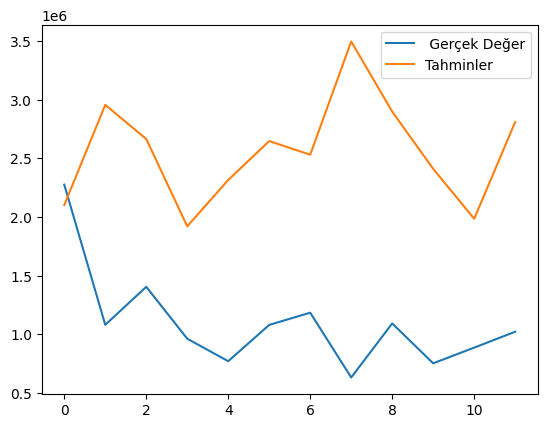

In [274]:
# Toplam satış tahminin prophet ile yapılması
# dffd değişkeninin oluşturulması

dffb = df_grouped_taring[["tarihm", "tutar"]]
dffb.columns =["ds","y"]
dffb["ds"] = pd.to_datetime(dffb["ds"])


# Modelin kurulumu
# !pip install prophet
from prophet import Prophet

model = Prophet()
model.fit(dffb)


# 2023 yılı için tarih dataseti oluşturma
future = list()
for i in range(8,21):
  if i <= 12:
    date = "2023-%02d" %i
  else:
    date = "2024-%02d" %(i-12)
  future.append([date])

future = pd.DataFrame(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])
forecast = model.predict(future)

print("#####################################################################")
print("#####################################################################")


# Tahminin yapılması ve değerlerin yazdırılması
print(forecast [["ds", "yhat", "yhat_lower", "yhat_upper"]].head())

print("#####################################################################")
print("#####################################################################")

## Tahmin modelinin görselleştirilmesi
#!pip install matplotlib
from matplotlib import pyplot
model.plot(forecast)
pyplot.show()

print("#####################################################################")
print("#####################################################################")

# manuel değerlendirme

dfmanuel = df_grouped_taring[["tarihm", "tutar"]]
dfmanuel.columns = ["ds","y"]
dfmanuel ["ds"] = pd.to_datetime(dfmanuel["ds"])

# son 3 ayı atıyoruz ve bunları tahmin etmeye çalışıcaz
train =dfmanuel.drop(dfmanuel.index[-12:])

modelx = Prophet()
modelx.fit(train)

futurex = list()
for i in range(9,21):
  if i<=12:
    date = "2022-%02d" % i
  else:
    date ="2023-%02d" %(i-12)
  futurex.append([date])

futurex = pd.DataFrame(futurex)
futurex.columns = ["ds"]
futurex["ds"] = pd.to_datetime(futurex["ds"])

print( "Bunun adı: verbose false:")
forecastx = modelx.predict(futurex)

y_true = dffb["y"][-12:].values
y_pred = forecastx["yhat"].values

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print("MAE: %.3f" %mae)


print("#####################################################################")
print("#####################################################################")

pyplot.plot(y_true, label =" Gerçek Değer")
pyplot.plot(y_pred, label = "Tahminler")
pyplot.legend()
pyplot.show()

### Firma bazlı satış zaman serisi

In [275]:
# Müşteri ürün değişkeninin oluşturulması
musteriürün = df.groupby(["musteri","ürün"]).agg({"tutar": ["sum","mean","median", "std"]})
musteriürün.head()

tutar  \
                                                                          sum   
musteri                                     ürün                                
A & A TOOL AND NAILS                        PLASTİĞE DİZİLİ ÇİVİLER  54210.65   
A FORGED TOOL S.A.                          DÜz ÇİVİLER              29533.68   
A.R.C. AMB. MALZ. İMAL. SAN. TİC. LTD. ŞTİ. DÜz ÇİVİLER               4122.82   
                                            T.DİZ.ÇİVİLER             3547.48   
ABALIOĞLU YEM SOYA TEKSTİL SAN.A.Ş.         T.DİZ.ÇİVİLER              304.21   

                                                                                   \
                                                                             mean   
musteri                                     ürün                                    
A & A TOOL AND NAILS                        PLASTİĞE DİZİLİ ÇİVİLER  18070.216667   
A FORGED TOOL S.A.                          DÜz ÇİVİLER               9844.560000   
A.R.C. AMB. MALZ. İMAL. SAN. TİC. LTD. ŞTİ. DÜz ÇİVİLER                274.854667   
                                            T.DİZ.ÇİVİLER              197.082222   
ABALIOĞLU YEM SOYA TEKSTİL SAN.A.Ş.         T.DİZ.ÇİVİLER              304.210000   

                                                                               \
                                                                       median   
musteri                                     ürün                                
A & A TOOL AND NAILS                        PLASTİĞE DİZİLİ ÇİVİLER  15785.92   
A FORGED TOOL S.A.                          DÜz ÇİVİLER              10235.60   
A.R.C. AMB. MALZ. İMAL. SAN. TİC. LTD. ŞTİ. DÜz ÇİVİLER                254.07   
                                            T.DİZ.ÇİVİLER              180.59   
ABALIOĞLU YEM SOYA TEKSTİL SAN.A.Ş.         T.DİZ.ÇİVİLER              304.21   

                                                                                  
                                                                             std  
musteri                                     ürün                                  
A & A TOOL AND NAILS                        PLASTİĞE DİZİLİ ÇİVİLER  4149.468999  
A FORGED TOOL S.A.                          DÜz ÇİVİLER              8183.300213  
A.R.C. AMB. MALZ. İMAL. SAN. TİC. LTD. ŞTİ. DÜz ÇİVİLER               178.706678  
                                            T.DİZ.ÇİVİLER              60.165314  
ABALIOĞLU YEM SOYA TEKSTİL SAN.A.Ş.         T.DİZ.ÇİVİLER                    NaN

#### 1- PRIMESOURCE BUILDING PRODUCTS,INC.

In [276]:
# dfprime değişkeninin oluşturulması
dfprime = df[df["musteri"] == "PRIMESOURCE BUILDING PRODUCTS,INC."]
dfprime = dfprime[["ürün", "tarih", "kg", "tutar"]]

# ürün istatiksel bilgiler
dfprime.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]})


tutar                                      
                                sum          mean    median           std
ürün                                                                     
PLASTİĞE DİZİLİ ÇİVİLER  5046492.16  17282.507397  18982.78  10137.549048
T.DİZ.ÇİVİLER            1997756.18  10570.138519   8821.98   8974.173408

In [277]:
# PRIMESOURCE grafiği
df_groupedpr = dfprime.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_groupedpr, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'PRIMESOURCE BUILDING PRODUCTS INC. ', 'x': 0.5},legend_title=None)
fig.show()

#### 2- METROPOLITAN STAPLE CORP.

In [278]:
# dfmetro değişkeninin oluşturulması
dfmetro = df[df["musteri"] == "METROPOLITAN STAPLE CORP."]
dfmetro = dfmetro[["ürün", "tarih", "kg", "tutar"]]

# dfmetro istatiksel bilgiler
dfmetro.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

tutar                                    
                                sum         mean    median          std
ürün                                                                   
T.DİZ.ÇİVİLER            5407295.17  8583.008206  5463.335  8761.265462
PLASTİĞE DİZİLİ ÇİVİLER    79824.23  2660.807667  1458.415  2924.811312
DÜz ÇİVİLER                 5087.76  1695.920000  1640.660  1008.496118

In [279]:
# METROPOLITAN grafiği
df_groupeda = dfmetro.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_groupeda, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'METROPOLITAN STAPLE CORP.', 'x': 0.5},legend_title=None)
fig.show()

#### 3- MADERAS VICENTE CASTILLO E HIJOS, S.L.

In [280]:
# dfmaderas değişkeninin oluşturulması
dfmaderas = df[df["musteri"] == "MADERAS VICENTE CASTILLO E HIJOS, S.L."]
dfmaderas = dfmaderas[["ürün", "tarih", "kg", "tutar"]]

#dfmaderas istatiksel bilgiler
dfmaderas.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

tutar                                     
                      sum         mean    median           std
ürün                                                          
OVALI ÇİVİLER  2321322.21  7392.745892  4308.480   8126.029876
T.DİZ.ÇİVİLER  1156549.41  8261.067214  2304.650  12447.623088
DÜz ÇİVİLER     225026.83  9376.117917  8753.775   9148.612463

In [281]:
# MADERAS VICENTE grafiği
df_grouped = dfmaderas.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'MADERAS VICENTE CASTILLO E HIJOS, S.L.', 'x': 0.5},legend_title=None)
fig.show()

##### Maderas ovalı çivi

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqb4tkmpb/hg9igtpl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqb4tkmpb/0ynrc7bq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94078', 'data', 'file=/tmp/tmpqb4tkmpb/hg9igtpl.json', 'init=/tmp/tmpqb4tkmpb/0ynrc7bq.json', 'output', 'file=/tmp/tmpqb4tkmpb/prophet_modelpd22y61s/prophet_model-20231004125542.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:55:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


#####################################################################
#####################################################################


12:55:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
0  2023-09-01  103018.329822   71866.189029  134253.057354
1  2023-10-01  178101.293927  145769.769244  209202.514119
2  2023-11-01  121062.745496   90102.500792  152813.400796
3  2023-12-01   67702.261266   36790.784575  100118.217100
4  2024-01-01  252201.022120  219329.252330  284155.869513
5  2024-02-01  117935.480468   86627.918227  147883.510495
6  2024-03-01  166217.694695  135100.936778  199878.181650
7  2024-04-01  155995.155111  125161.885979  189002.017816
8  2024-05-01  219423.043108  190217.339660  250743.889594
9  2024-06-01  205146.597466  173586.597678  238345.171617
10 2024-07-01  183075.543974  152354.325274  213761.998044
11 2024-08-01   37371.165215    5995.495877   67898.820119
12 2024-09-01  334050.787057  300800.688400  366366.786293
13 2024-10-01  244202.299831  212620.845013  275792.321812
14 2024-11-01  204979.634000  169875.844373  236252.015815
15 2024-12-01  181185.610985  148066.518442  211942.5043

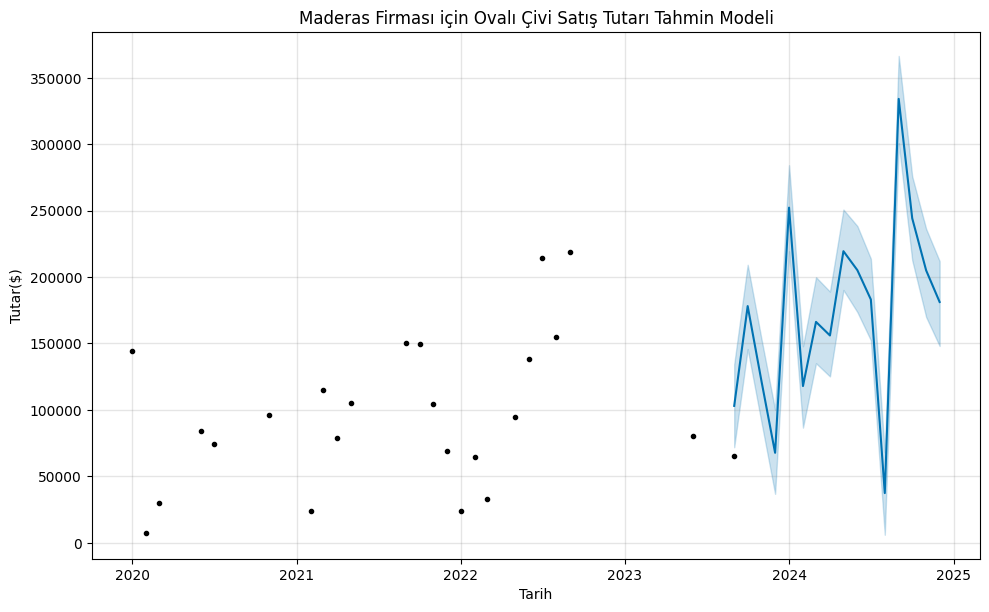

#####################################################################
#####################################################################
MAE: 1497198.823


In [305]:
dfmaderasovalı = dfmaderas[dfmaderas["ürün"] == "OVALI ÇİVİLER"]

data = dfmaderasovalı.groupby(by="tarih")[["tutar"]].sum().reset_index()
data .columns = ["ds", "y"]

print("#####################################################################")
print("#####################################################################")

data["ds"] = pd.to_datetime(data["ds"])
data["ds"] = data["ds"].dt.strftime("%Y.%m")
data = data.groupby("ds")["y"].sum().to_frame()
data = data.reset_index()
data["ds"] = pd.to_datetime(data["ds"])

# Modelin kurulumu
from prophet import Prophet
model = Prophet()
model.fit(data)

future = list()
for i in range(9,25):
  if i <=12:
    date = "2023-%02d" %i
  else:
    date = "2024-%02d" %(i-12)
  future.append([date])

future = pd.DataFrame(future)
future.columns =["ds"]
future["ds"] = pd.to_datetime(future["ds"])
forecast = model.predict(future)

# Tahminler
print(forecast [["ds", "yhat", "yhat_lower", "yhat_upper"]])

print("#####################################################################")
print("#####################################################################")

model.plot(forecast)
pyplot.xlabel("Tarih")
pyplot.ylabel("Tutar($)")
pyplot.title("Maderas Firması için Ovalı Çivi Satış Tutarı Tahmin Modeli")
pyplot.show()


print("#####################################################################")
print("#####################################################################")

#Hata değerleri
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print("MAE: %.3f" %mae)

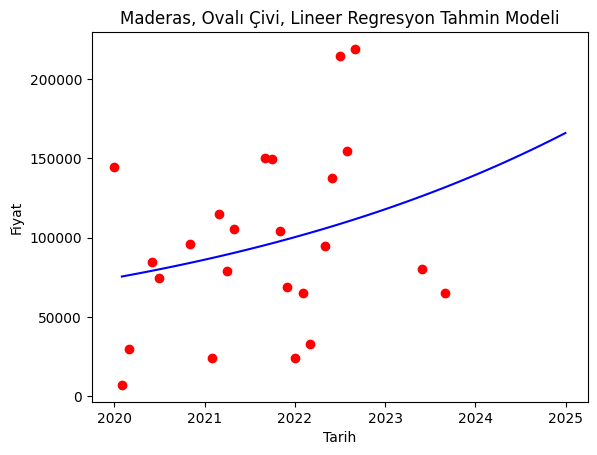

In [341]:
import pandas as pd
df = df.sort_values(by="ds")
df["ds"] = pd.to_datetime(df["ds"], format="%Y-%m")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=12)
X = df["ds"].values.reshape(-1, 1)
y = df["y"].values
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

future_dates = pd.date_range(start="2020-01-01", end="2024-12-31", freq="M")
future_X = future_dates.values.reshape(-1, 1)
future_X_poly = poly_reg.transform(future_X)
future_y_pred = lin_reg.predict(future_X_poly)

import matplotlib.pyplot as plt
plt.scatter(X, y, color="red")
plt.plot(future_X, future_y_pred, color="blue")


plt.title("Maderas, Ovalı Çivi, Lineer Regresyon Tahmin Modeli")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()


In [332]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



# Verileri tarihe göre sıralayın
df = df.sort_values(by="ds")

# Tarih sütununu datetime tipine dönüştürün
df["ds"] = pd.to_datetime(df["ds"], format="%Y-%m")

# X ve y değerlerini tanımlayın
X = df["ds"].values.reshape(-1, 1)
y = df["y"].values

# Polinom regresyon sınıfını tanımlayın
poly_reg = PolynomialFeatures()

# En iyi dereceyi bulmak için farklı dereceler deneyin
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# En düşük RMSE değerine sahip dereceden modeli seçin
best_degree = None
min_rmse = None
for degree in degrees:
    # Polinom regresyon modelini uygulayın
    poly_reg.degree = degree
    X_poly = poly_reg.fit_transform(X)

    # Lineer regresyon modelini uygulayın
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    # Gelecekteki satışları tahmin edin
    future_dates = pd.date_range(start="2020-01-01", end="2024-12-31", freq="M")
    future_X = future_dates.values.reshape(-1, 1)
    future_X_poly = poly_reg.transform(future_X)
    future_y_pred = lin_reg.predict(future_X_poly)

    # RMSE değerini hesaplayın
    rmse = np.sqrt(np.mean((future_y_pred - y)**2))

    # En iyi dereceyi seçin
    if min_rmse is None or rmse < min_rmse:
        min_rmse = rmse
        best_degree = degree

# En iyi derecenin değerini yazdırın
print("En iyi derece:", best_degree)


ValueError: ignored

In [331]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



df = df.sort_values(by="ds")

# Tarih sütununu datetime tipine dönüştürün
df["ds"] = pd.to_datetime(df["ds"], format="%Y-%m")

# X ve y değerlerini tanımlayın
X = df["ds"].values.reshape(-1, 1)
y = df["y"].values

# Polinom regresyon sınıfını tanımlayın
poly_reg = PolynomialFeatures()

# En iyi dereceyi bulmak için farklı dereceler deneyin
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# En düşük RMSE değerine sahip dereceden modeli seçin
best_degree = None
min_rmse = None
for degree in degrees:
    # Polinom regresyon modelini uygulayın
    poly_reg.degree = degree
    X_poly = poly_reg.fit_transform(X)

    # Lineer regresyon modelini uygulayın
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    # Gelecekteki satışları tahmin edin
    future_dates = pd.date_range(start="2020-01-01", end="2024-12-31", freq="M")
    future_X = future_dates.values.reshape(-1, 1)
    future_X_poly = poly_reg.transform(future_X)
    future_y_pred = lin_reg.predict(future_X_poly)

    # RMSE değerini hesaplayın
    rmse = np.sqrt(np.mean((future_y_pred - y)**2))

    # En iyi dereceyi seçin
    if min_rmse is None or rmse < min_rmse:
        min_rmse = rmse
        best_degree = degree

# En iyi derecenin değerini yazdırın
print("En iyi derece:", best_degree)

# Modeli çizin
plt.scatter(X, y, color="red")
plt.plot(future_X, future_y_pred, color="blue")


plt.title("Maderas, Ovalı Çivi, Lineer Regresyon Tahmin Modeli")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()


ValueError: ignored

#### 4- SHANDEX CO.

In [ ]:
# dfshandex değişkeninin oluştrulması
dfshandex = df[df["musteri"] == "SHANDEX CO."]
dfshandex = dfshandex[["ürün", "tarih", "kg", "tutar"]]

#dfshandex iatatiksel bilgiler
dfshandex.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

In [ ]:
# dfshandex grafiği
df_grouped = dfshandex.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'SHANDEX CO.', 'x': 0.5},legend_title=None)
fig.show()

#### 5- AGLOLAK, S.L.

In [ ]:
# dfaglolak değişkeninin oluşturulması
dfaglolak = df[df["musteri"] == "AGLOLAK, S.L."]
dfaglolak = dfaglolak[["ürün", "tarih", "kg", "tutar"]]

#dfmaderas iatatiksel bilgiler
dfaglolak.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

In [ ]:
# dfaglolak değişkeninin oluşturulması
df_grouped = dfaglolak.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

# dfaglolak grafiği
fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'AGLOLAK, S.L.', 'x': 0.5},legend_title=None)
fig.show()